In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../data400_share/beer.csv', index_col='index')

In [5]:
df.head()

,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
index,,,,,,,,,,,,,,,,,,
40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


In [6]:
BEER_COLUMNS = ['beer/ABV', 'beer/beerId', 'beer/brewerId', 'beer/name', 'beer/style']
REVIEW_COLUMNS = ['review/appearance', 'review/aroma', 'review/overall', 'review/palate',
                  'review/taste', 'review/text', 'review/timeUnix']
USER_COLUMNS = ['user/ageInSeconds', 'user/birthdayRaw', 'user/birthdayUnix', 'user/gender',
                'user/profileName']

beer_df = df[BEER_COLUMNS].rename(
    columns={'beer/ABV': 'ABV', 'beer/beerId': 'id', 
             'beer/brewerId': 'brewerId', 'beer/name': 'name',
            'beer/style': 'style'}).drop_duplicates().set_index('id')
review_df = df[REVIEW_COLUMNS + ['beer/beerId', 'user/profileName']].rename(
    columns={'review/appearance': 'appearance', 'review/aroma': 'aroma',
             'review/overall': 'overall', 'review/palate': 'palate',
             'review/taste': 'taste', 'review/text': 'text',
             'review/timeStruct': 'timeStruct', 'review/timeUnix': 'timeUnix',
            'beer/beerId': 'beer/id', 'user/profileName': 'user/profileName'})
user_df = df[USER_COLUMNS].rename(
    columns={'user/ageInSeconds': 'ageInSeconds', 'user/birthdayRaw': 'birthdayRaw',
             'user/birthdayUnix': 'birthdayUnix', 'user/gender': 'gender',
             'user/profileName': 'profileName'}).drop_duplicates().set_index('profileName')

In [7]:
df.shape, beer_df.shape, review_df.shape, user_df.shape

((37500, 18), (1731, 4), (37500, 9), (7442, 4))

In [8]:
AGG_FUNCS = [np.mean, np.std, np.median, 'count']

agg_user_reviews = review_df.groupby('user/profileName').aggregate(
    {'overall': AGG_FUNCS, 'palate': AGG_FUNCS, 'taste': AGG_FUNCS,
    'appearance': AGG_FUNCS, 'aroma': AGG_FUNCS})
agg_user_reviews.head()

overall                        palate                         \
                    mean       std median count   mean       std median count   
user/profileName                                                                
0110x011            4.75  0.353553   4.75     2    4.5  0.707107    4.5     2   
05Harley            3.80  0.758288   4.00     5    4.1  0.418330    4.0     5   
0tt0                4.00       NaN   4.00     1    3.0       NaN    3.0     1   
100floods           4.00       NaN   4.00     1    4.5       NaN    4.5     1   
1099                4.50       NaN   4.50     1    3.0       NaN    3.0     1   

                 taste                        appearance                   \
                  mean       std median count       mean       std median   
user/profileName                                                            
0110x011           4.5  0.707107    4.5     2        4.0  0.707107    4.0   
05Harley           3.9  0.821584    4.0     5        4.3  0.570088    4.5   
0tt0               4.0       NaN    4.0     1        4.0       NaN    4.0   
100floods          4.5       NaN    4.5     1        4.0       NaN    4.0   
1099               4.0       NaN    4.0     1        4.0       NaN    4.0   

                       aroma                         
                 count  mean       std median count  
user/profileName                                     
0110x011             2   4.0  0.707107    4.0     2  
05Harley             5   3.8  0.570088    4.0     5  
0tt0                 1   3.5       NaN    3.5     1  
100floods            1   5.0       NaN    5.0     1  
1099                 1   3.5       NaN    3.5     1

In [9]:
style_counts = beer_df['style'].value_counts()

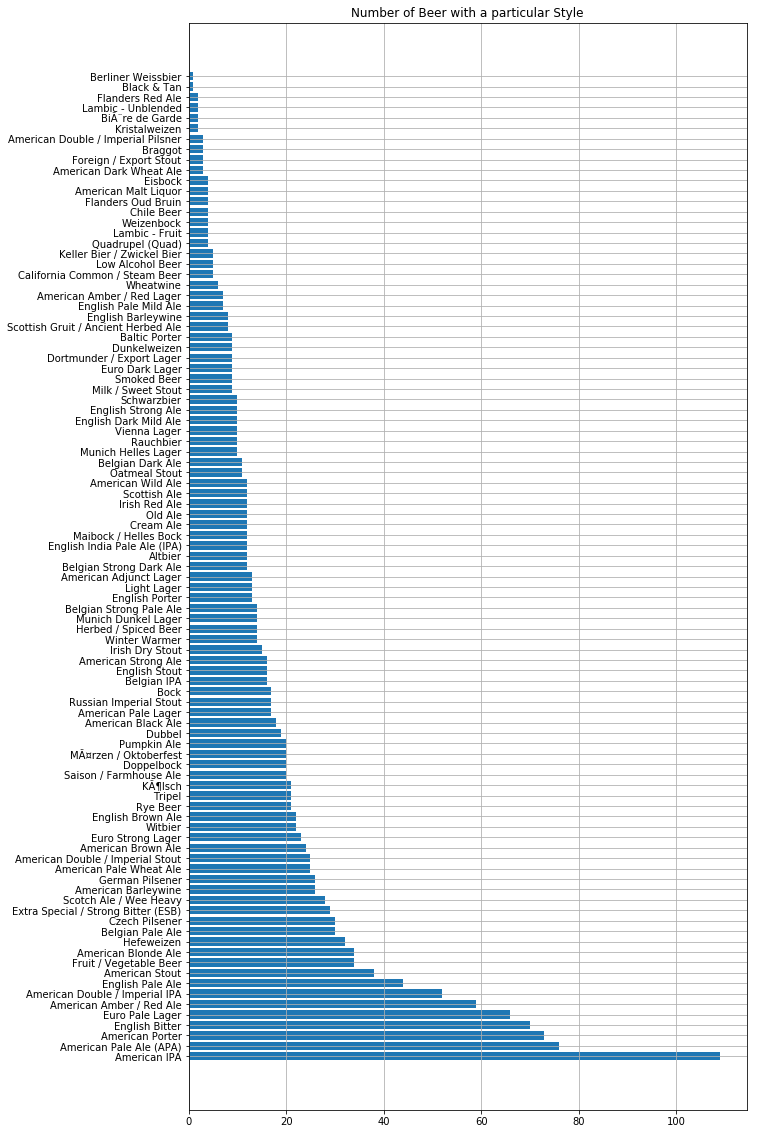

In [10]:
plt.figure(figsize=(10, 20))
plt.grid()
plt.barh(np.arange(len(style_counts)), style_counts, tick_label=style_counts.index);
plt.title('Number of Beer with a particular Style');

In [16]:
!pip install textblob
from textblob import TextBlob
opinion = TextBlob("I like this a lot i love it so much")
opinion.sentiment.polarity

0.35

_Issues with Vader compund value, it's registering the compound polarity of many text reviews as 0. So switching over to TextBlob_

In [10]:
list_review = [x for x in df["review/text"]]

In [19]:
first = list_review[0]
sid = SentimentIntensityAnalyzer()
k = sid.polarity_scores(first)

In [44]:
"t"+"y"

'ty'

In [13]:
### remove null reviews
sum(df["review/text"].isnull())
df = df.dropna(subset=["review/text"])

In [25]:
## Adding the compound polarity column into the df
polar_type = "TBpolar"
df.loc[:,"review/" + polar_type] = pd.Series(np.random.randn(len(df['review/text'])), index=df.index)
col_idx = df.columns.get_loc("review/text")
goal_idx = df.columns.get_loc("review/" + polar_type)
###sid = SentimentIntensityAnalyzer()
for idx in range(0, len(df)):
    sentence = df.iloc[idx,col_idx]
    tb = TextBlob(sentence).sentiment.polarity
'''    score = sid.polarity_scores(sentence)
    #print(score, idx, col_idx)
    df.iloc[idx, goal_idx] = score['compound']'''
    df.iloc[idx, goal_idx] = tb
    
    

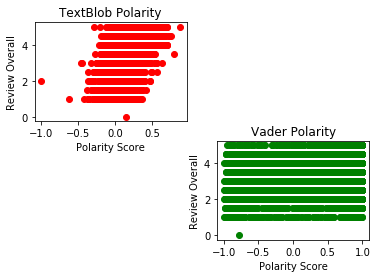

In [48]:
'''plt.figure(figsize=(20, 10))
plt.plot(df["review/TBpolar"], df["review/overall"], 'ro')
##plt.plot(df["review/VaderPolar"], df["review/overall"], 'go')
plt.ylabel('Review Overall')
plt.xlabel('Polarity Score')
'''
plt.figure(1)
plt.subplot(221)
plt.plot(df["review/TBpolar"], df["review/overall"], 'ro')
plt.ylabel('Review Overall')
plt.xlabel('Polarity Score')
plt.title('TextBlob Polarity')

plt.subplot(224)
plt.plot(df["review/VaderPolar"], df["review/overall"], 'go')
plt.ylabel('Review Overall')
plt.xlabel('Polarity Score')
plt.title('Vader Polarity')
plt.show()


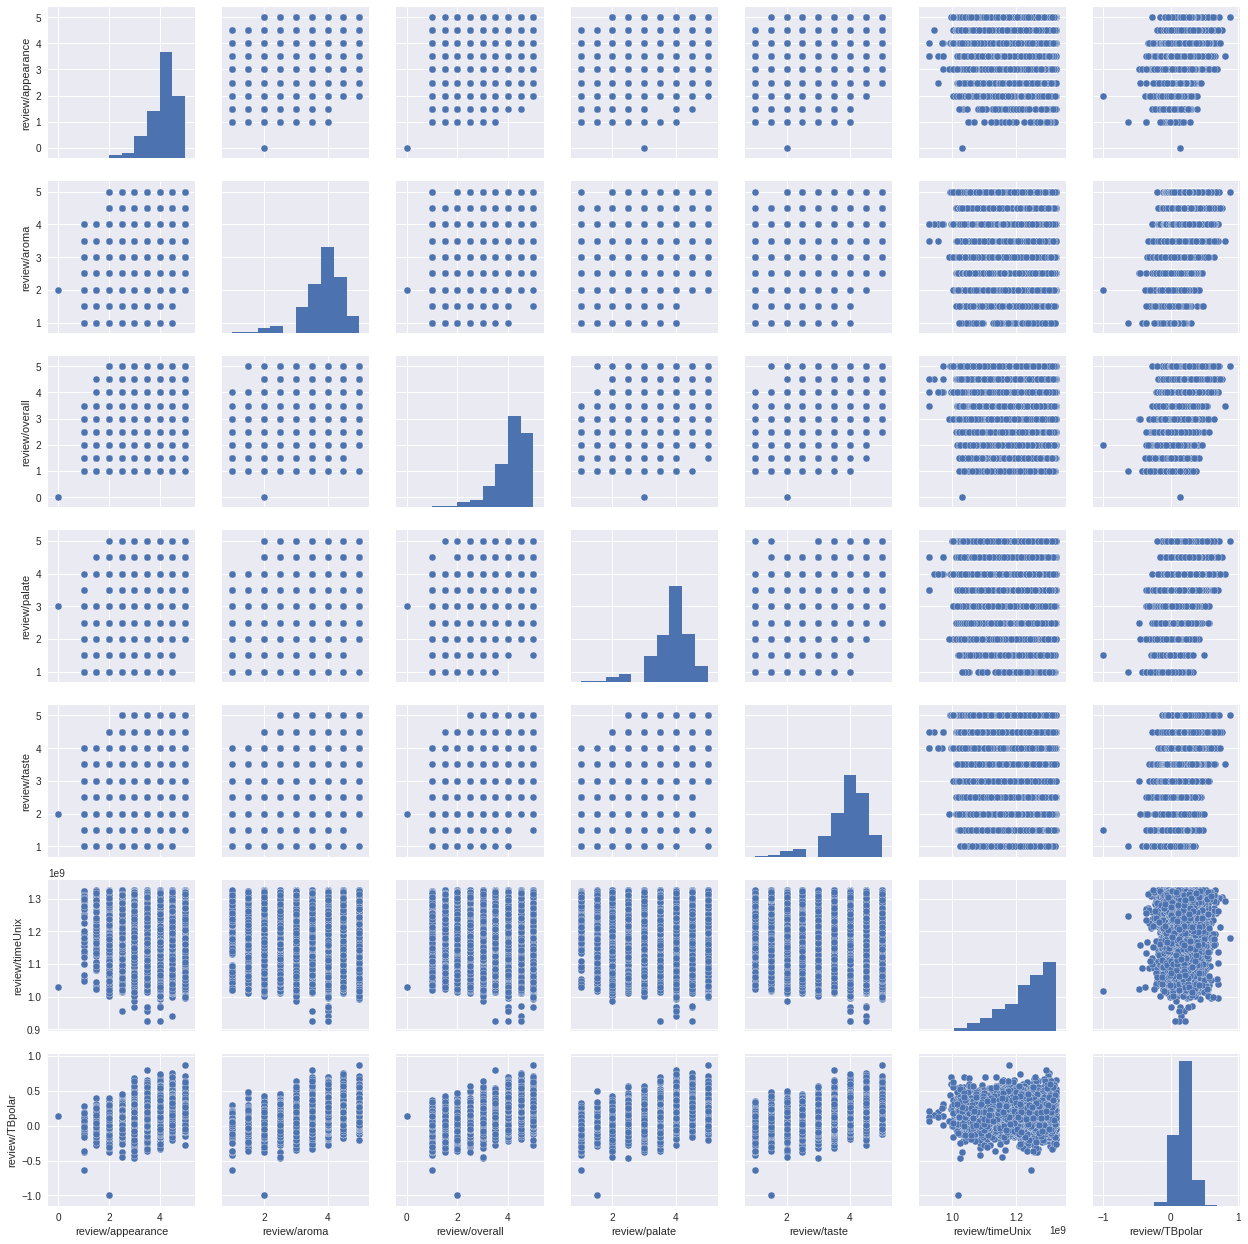

In [58]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
#REVIEW_COLUMNS.extend(["review/TBpolar"])
sns.pairplot(df[REVIEW_COLUMNS])

